In [1]:
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import numpy as np
import sys
import matplotlib.pyplot as plt 
np.set_printoptions(threshold=sys.maxsize)

In [2]:
csv1 = pd.read_csv('sequence_execution_time.csv')
#csv1.head()

In [3]:
csv1.tail()

,sequence_identifier,read_sequence,quality,execution_time
3999995,@HWI-D00360:5:H814YADXX:1:1115:18756:14266 1:N...,ACTAATAAAGAAAAAAAGAGAGAAGAATCAAATAGACGCAATAAAA...,C@CFFFFFHHHHHJGEHHIJJJIJIIJJJJJIJJIFIIIIGIJJIJ...,341.792
3999996,@HWI-D00360:5:H814YADXX:1:1115:18805:14266 1:N...,ATAAATGAATAATAGGCGGTTTCTGACATCAGGAAGTTTAGACCGC...,CCCFFFFFGHHHHJJJJJJGIJHIJGIIJJIJJIIJHIJJIIJJJJ...,556.625
3999997,@HWI-D00360:5:H814YADXX:1:1115:18868:14278 1:N...,GTATGGAAATACCTGGATGTCCAGGCAGAAGTGTGCTACAGGGGCA...,@@CFFFFFHGHHHJIIIGIGHHAGGGIIBGG?ECCFFHIJJGEBDA...,8523.708
3999998,@HWI-D00360:5:H814YADXX:1:1115:18797:14322 1:N...,AACTCAGTAATTACTTTGATTTGGAGTCTTAATGCAATTTTACCCA...,CCCFFFFFHDHHHJJJJJJIJJJIJIHGHIIJJJJIJIJJJJJJJI...,880.708
3999999,@HWI-D00360:5:H814YADXX:1:1115:18971:14400 1:N...,GAAAATAGTTTCCCATTTGTTGCCACTGTTTTAAACTTACTGTTAT...,@@@FDFDBBDFFBFIGGGCFGFHHGIGEHIIIIEIIGE@GIIIGGI...,624.208


In [4]:
#sns.boxplot(csv1['execution_time'])
#Removing outliers for dataset of 500 with same settings as below gave better results but graph was not good enough; mse =4504.101113148902 rmsle = 0.10840977539189336

In [5]:
#data = csv1.drop(['sequence_identifier','quality'], axis = 1)
data = csv1

In [6]:
data1 = data.drop(csv1.index[5000:]) #datasize = 500,size = 9, ngram =(4,4) random_state = 42, rmse = 4902308.235271806 rmsle = 0.9812317013663807
# increase of sample size to 100,000 increased r2 of test data to 0.52896, test_size= 0.2, rmse_train = 0.00013077200709273113, rmse_test = 0.30816619086927893 ,rmsle = 0.0742664390437385, size=9, CountVectorizer(ngram_range = (4,4), random_state=42   
#data.head()

In [7]:
data1.tail()

,sequence_identifier,read_sequence,quality,execution_time
4995,@HWI-D00360:5:H814YADXX:1:1101:18515:3754 1:N:...,CAGTGCTATTCACAATTGCAGAGAAATGGAATTAACCTAGATGCCC...,BCCFFFFFHGHHHJIJJJJIJJJIIIJJIIIHJJJJJJJJIJIJJJ...,700.041
4996,@HWI-D00360:5:H814YADXX:1:1101:18597:3869 1:N:...,ACCGGCCCGGGTTCTTTCTGTGTTCCACGTACCTATTAGTCCCACT...,CCCFFFFFGHHDHIJJJJJGIJJJJJJJIHIJJJIJJIIDHHIDII...,239.041
4997,@HWI-D00360:5:H814YADXX:1:1101:18687:3872 1:N:...,TCTGGACAAGCTGTATTTGAATCTGTGTGAAGTCAGGAGTGTGCAG...,CCCFFFFFHHHHHJJJJJJJJJJJJJJJJJJJJJJJJIJFHHIIII...,231.041
4998,@HWI-D00360:5:H814YADXX:1:1101:18640:3880 1:N:...,GATAACTGTATTTTTCAAAACTTAAATTTCAGAACATTTTATAGTC...,@@@FFFFFHHHHGJJJIGGGIIIJJIIIIJIIHJIIJJJJGIDHII...,787.500
4999,@HWI-D00360:5:H814YADXX:1:1101:18520:3923 1:N:...,TCACAAGGTTTTATATCAGCAACAGAGGACTAAGACCAAATATTTC...,CCCFFFFFDFHHHJJJJJJJJJJJJIJJJJJJJJJJJJJJJJJJJJ...,752.125


In [8]:
data1.describe()

,execution_time
count,5000.000000
mean,2048.332630
std,4126.782632
min,196.458000
25%,559.416750
50%,676.042000
75%,1448.677750
max,65904.334000


In [9]:
reads = data1.drop(['sequence_identifier','quality'], axis =1)
reads

,read_sequence,execution_time
0,CTGGTCCTAACATCTGTTGACCATAGCCATATTTTTCAGAAAAGTC...,2295.125
1,TGGCTATGGGCTGCAATAATTCGTCTTTCTGAAAGGGCATTCAGCC...,674.000
2,ACTTTCTATCTCTATGGATTTAACCATTGTGGATATTTCATGTAAA...,757.209
3,ATCAAAAACATTCAAATGAAATCATCTTAAGTGCCAGAATTATAAA...,397.042
4,CAGGTTCCAATATTACAAATGCAAGGCCAGAAGGAGACTGCAAATG...,675.000
...,...,...
4995,CAGTGCTATTCACAATTGCAGAGAAATGGAATTAACCTAGATGCCC...,700.041
4996,ACCGGCCCGGGTTCTTTCTGTGTTCCACGTACCTATTAGTCCCACT...,239.041
4997,TCTGGACAAGCTGTATTTGAATCTGTGTGAAGTCAGGAGTGTGCAG...,231.041
4998,GATAACTGTATTTTTCAAAACTTAAATTTCAGAACATTTTATAGTC...,787.500


In [10]:
#Normalize data
reads['execution_time'] = np.log10(reads.execution_time)
reads

,read_sequence,execution_time
0,CTGGTCCTAACATCTGTTGACCATAGCCATATTTTTCAGAAAAGTC...,3.360806
1,TGGCTATGGGCTGCAATAATTCGTCTTTCTGAAAGGGCATTCAGCC...,2.828660
2,ACTTTCTATCTCTATGGATTTAACCATTGTGGATATTTCATGTAAA...,2.879216
3,ATCAAAAACATTCAAATGAAATCATCTTAAGTGCCAGAATTATAAA...,2.598836
4,CAGGTTCCAATATTACAAATGCAAGGCCAGAAGGAGACTGCAAATG...,2.829304
...,...,...
4995,CAGTGCTATTCACAATTGCAGAGAAATGGAATTAACCTAGATGCCC...,2.845123
4996,ACCGGCCCGGGTTCTTTCTGTGTTCCACGTACCTATTAGTCCCACT...,2.378472
4997,TCTGGACAAGCTGTATTTGAATCTGTGTGAAGTCAGGAGTGTGCAG...,2.363689
4998,GATAACTGTATTTTTCAAAACTTAAATTTCAGAACATTTTATAGTC...,2.896251


In [11]:
# sns.boxplot(data = reads['execution_time'])

In [12]:
# #new = reads.drop(reads[reads['execution_time'] >= 2500].index, inplace = True)
# reads = reads[reads.execution_time <= 3.5]
# #new

In [13]:
# sns.boxplot(data = reads['execution_time'])

In [14]:
# reads = reads[reads.execution_time > 2.6]
# #reads = reads[reads.execution_time < 3.0]
# #new1

In [15]:
# sns.boxplot(data = reads['execution_time'])

In [16]:
# reads = reads[reads.execution_time < 3.0]

In [17]:
reads

,read_sequence,execution_time
0,CTGGTCCTAACATCTGTTGACCATAGCCATATTTTTCAGAAAAGTC...,3.360806
1,TGGCTATGGGCTGCAATAATTCGTCTTTCTGAAAGGGCATTCAGCC...,2.828660
2,ACTTTCTATCTCTATGGATTTAACCATTGTGGATATTTCATGTAAA...,2.879216
3,ATCAAAAACATTCAAATGAAATCATCTTAAGTGCCAGAATTATAAA...,2.598836
4,CAGGTTCCAATATTACAAATGCAAGGCCAGAAGGAGACTGCAAATG...,2.829304
...,...,...
4995,CAGTGCTATTCACAATTGCAGAGAAATGGAATTAACCTAGATGCCC...,2.845123
4996,ACCGGCCCGGGTTCTTTCTGTGTTCCACGTACCTATTAGTCCCACT...,2.378472
4997,TCTGGACAAGCTGTATTTGAATCTGTGTGAAGTCAGGAGTGTGCAG...,2.363689
4998,GATAACTGTATTTTTCAAAACTTAAATTTCAGAACATTTTATAGTC...,2.896251


In [18]:
reads.max()

read_sequence     TTTTTTTTTTGAGACGGAGTCTTGCTCTGTCGCCCAGGCTGGAGTG...
execution_time                                             4.818914
dtype: object

In [19]:
reads.min()

read_sequence     AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACGAGAAAACAG...
execution_time                                              2.29327
dtype: object

In [20]:
# sns.boxplot(data = reads['execution_time'])

In [21]:
def Kmers_funct(seq, size=5): #148 characters/sequence  size = 6 better? Used 4 previously.[SIze = 9 gave a r_sq = 1 is this the best value for data = 250, train = 0.8 random = 42, ngaram 4,4]??
    #Performed much better with same settings and more data. used 1000. r_sq reduced to 0.9999999999999962
   return [seq[x:x+size].upper() for x in range(len(seq) - size + 1)]
#convert our training data sequences into short overlapping k-mers of length 6. Lets do that for each species of data we have using our Kmers_funct function.
reads['words'] = reads.apply(lambda x: Kmers_funct(x['read_sequence']), axis=1)
reads = reads.drop('read_sequence', axis=1)

In [22]:
reads

,execution_time,words
0,3.360806,"[CTGGT, TGGTC, GGTCC, GTCCT, TCCTA, CCTAA, CTA..."
1,2.828660,"[TGGCT, GGCTA, GCTAT, CTATG, TATGG, ATGGG, TGG..."
2,2.879216,"[ACTTT, CTTTC, TTTCT, TTCTA, TCTAT, CTATC, TAT..."
3,2.598836,"[ATCAA, TCAAA, CAAAA, AAAAA, AAAAC, AAACA, AAC..."
4,2.829304,"[CAGGT, AGGTT, GGTTC, GTTCC, TTCCA, TCCAA, CCA..."
...,...,...
4995,2.845123,"[CAGTG, AGTGC, GTGCT, TGCTA, GCTAT, CTATT, TAT..."
4996,2.378472,"[ACCGG, CCGGC, CGGCC, GGCCC, GCCCG, CCCGG, CCG..."
4997,2.363689,"[TCTGG, CTGGA, TGGAC, GGACA, GACAA, ACAAG, CAA..."
4998,2.896251,"[GATAA, ATAAC, TAACT, AACTG, ACTGT, CTGTA, TGT..."


In [23]:
human_texts = list(reads['words'])
for item in range(len(human_texts)):
   human_texts[item] = ' '.join(human_texts[item])
#separate labels
y_human = reads.iloc[:, 0].values # y_human for human_dna

In [24]:
# from sklearn.feature_extraction.text import CountVectorizer
# cv = CountVectorizer(ngram_range = (4,4)) # initially (4,4)
# X = cv.fit_transform(human_texts)
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer(ngram_range = (4,4))
X = tfid.fit_transform(human_texts)
#print(X)
#print(X[1])
#X = (X-np.mean(X))/np.std(X)

In [25]:
#from sklearn.preprocessing import MaxAbsScaler
#abs_scal = MaxAbsScaler()

#XX = abs_scal.fit_transform(X)

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y_human,
                                                   test_size = 0.20,
                                                   random_state=42)# changed random state from 42 to 0
                                                   

In [27]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [28]:
#model.fit(X, y_human)
model.fit(X_train, y_train)

LinearRegression()

In [29]:
r_sq = model.score(X_train,y_train)

In [30]:
r_sq

0.999999999540781

In [31]:
r_sq_test = model.score(X_test,y_test)
r_sq_test

0.37734007429382277

In [32]:
# rmse_train =
# rmse_test  =

In [33]:
y_pred = model.predict(X_test)

In [34]:
#y_pred

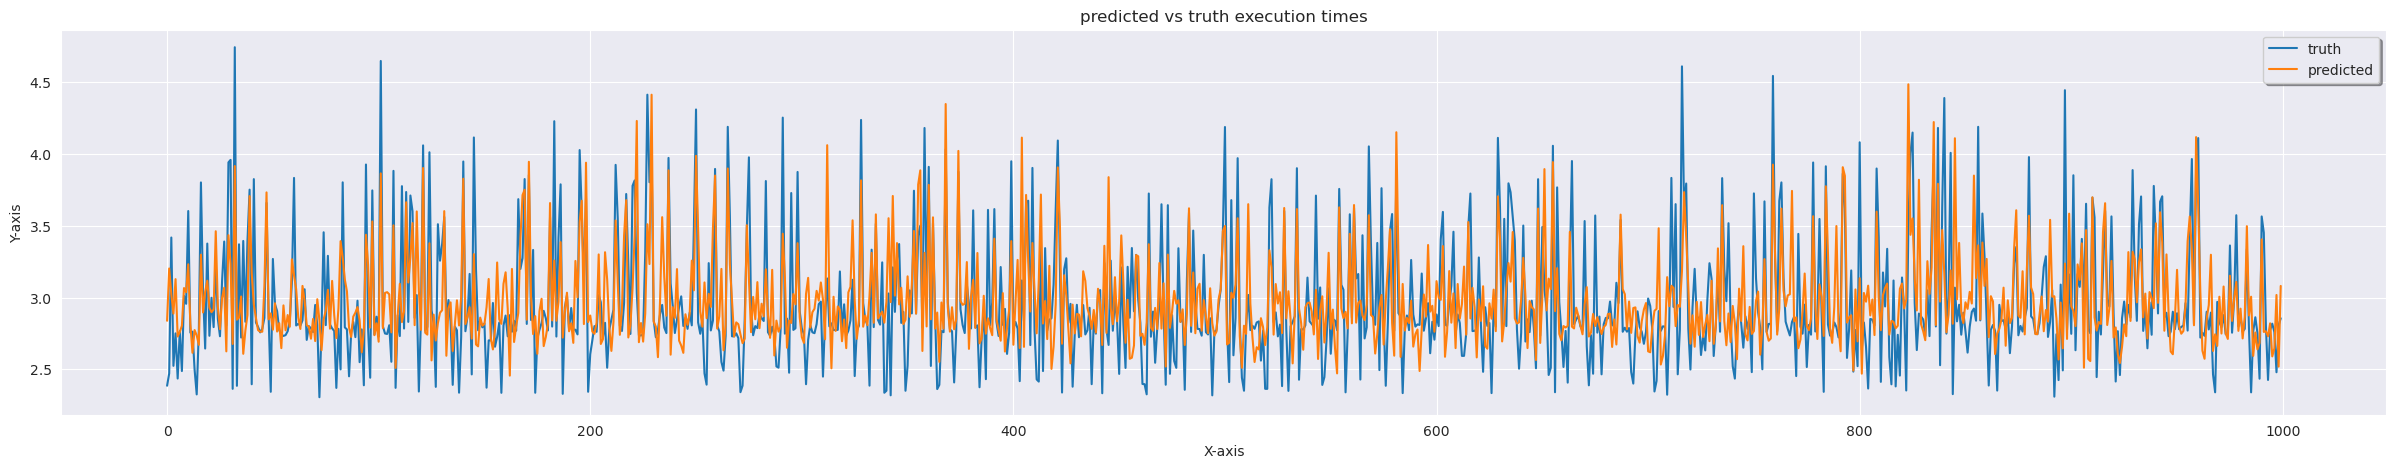

In [35]:
x_ax = range(len(y_test))
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(5)
plt.plot(x_ax, y_test, label="truth")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("predicted vs truth execution times")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [36]:
y_pred_non_log = 10**(y_pred)
y_test_non_log = 10**(y_test)

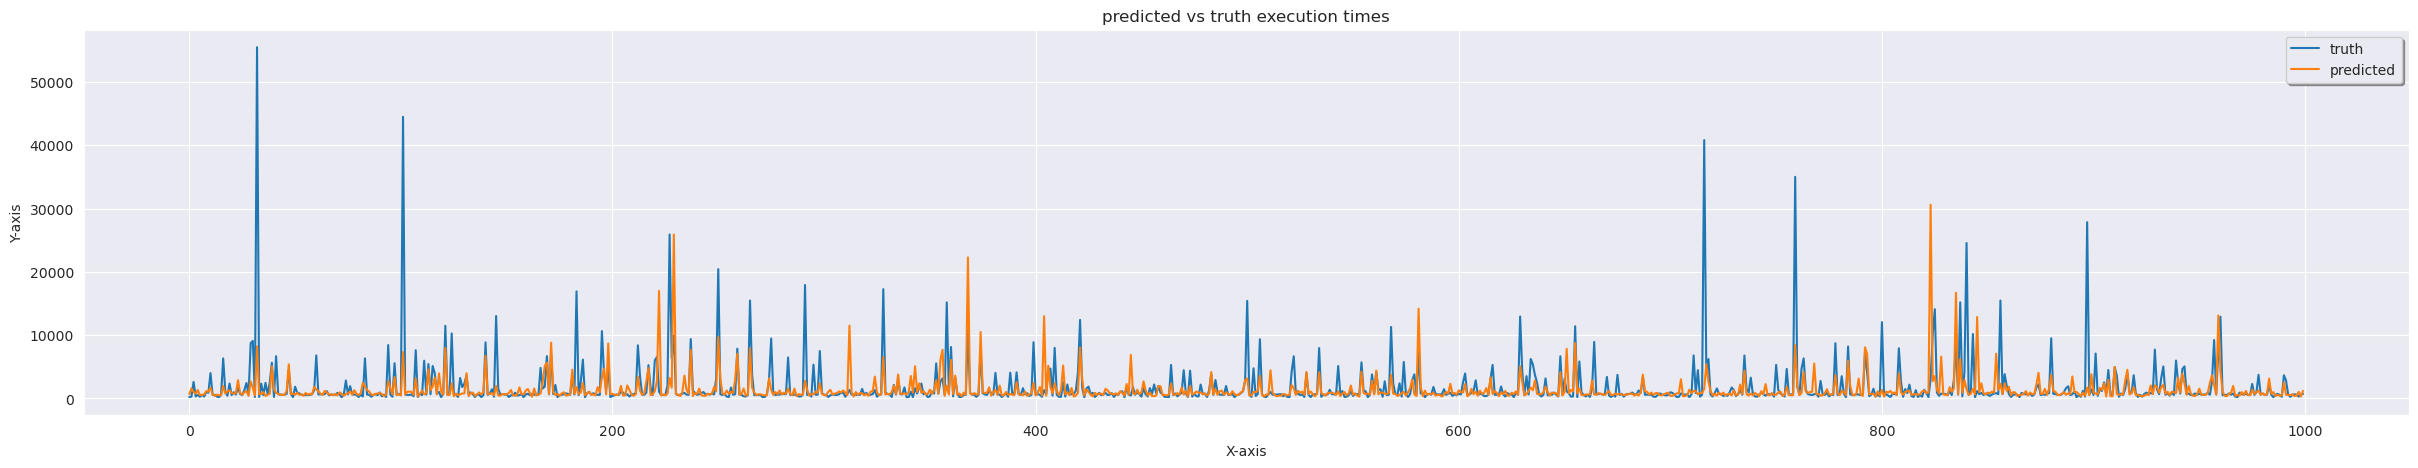

In [37]:
x_ax = range(len(y_test_non_log))
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(5)
plt.plot(x_ax, y_test_non_log, label="truth")
plt.plot(x_ax, y_pred_non_log, label="predicted")
plt.title("predicted vs truth execution times")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [38]:
from sklearn.metrics import mean_squared_error
ypred_train = model.predict(X_train)
rmse_train = np.sqrt(mean_squared_error(y_train, ypred_train))             ##8.775726751036775e-05 for 200 samples  and max abs scaler
rmse_train

9.81849310354501e-06

In [39]:
from sklearn.metrics import mean_squared_error
rmse_test = np.sqrt(mean_squared_error(y_test,y_pred))              ##1705.8371787033657 for 200 samples  and max abs scaler
rmse_test

0.34742518135119993

In [40]:
from sklearn.metrics import mean_squared_log_error
rmsle = mean_squared_log_error(y_test,y_pred)**0.5         ##1.2021350799389177 for 200 samples  and max abs scaler
rmsle

0.08460659235246876

In [41]:
rmsle_non_log = mean_squared_log_error(y_test_non_log,y_pred_non_log)**0.5        
rmsle_non_log

0.7991251515474478

In [42]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [43]:
cv = KFold(n_splits = 5, random_state= 42, shuffle=True)

In [44]:
# model_cv = LinearRegression()
# model_cv

In [45]:
scores = cross_val_score(model, X, y_human, scoring='r2', cv=cv, n_jobs=-1)

In [46]:
print(scores)

[0.37733996 0.35784556 0.38669355 0.4090107  0.35275061]


In [47]:
rmse_cv = np.sqrt(np.mean(np.absolute(scores)))
rmse_cv

0.6137817813829105

In [48]:
scores_non_log = 10**(scores)
rmse_cv_non_log = np.sqrt(np.mean(np.absolute(scores_non_log)))
rmse_cv_non_log

1.54384584020784

In [49]:
predictions = cross_val_predict (model, X, y_human, cv = cv)

In [50]:
#predictions

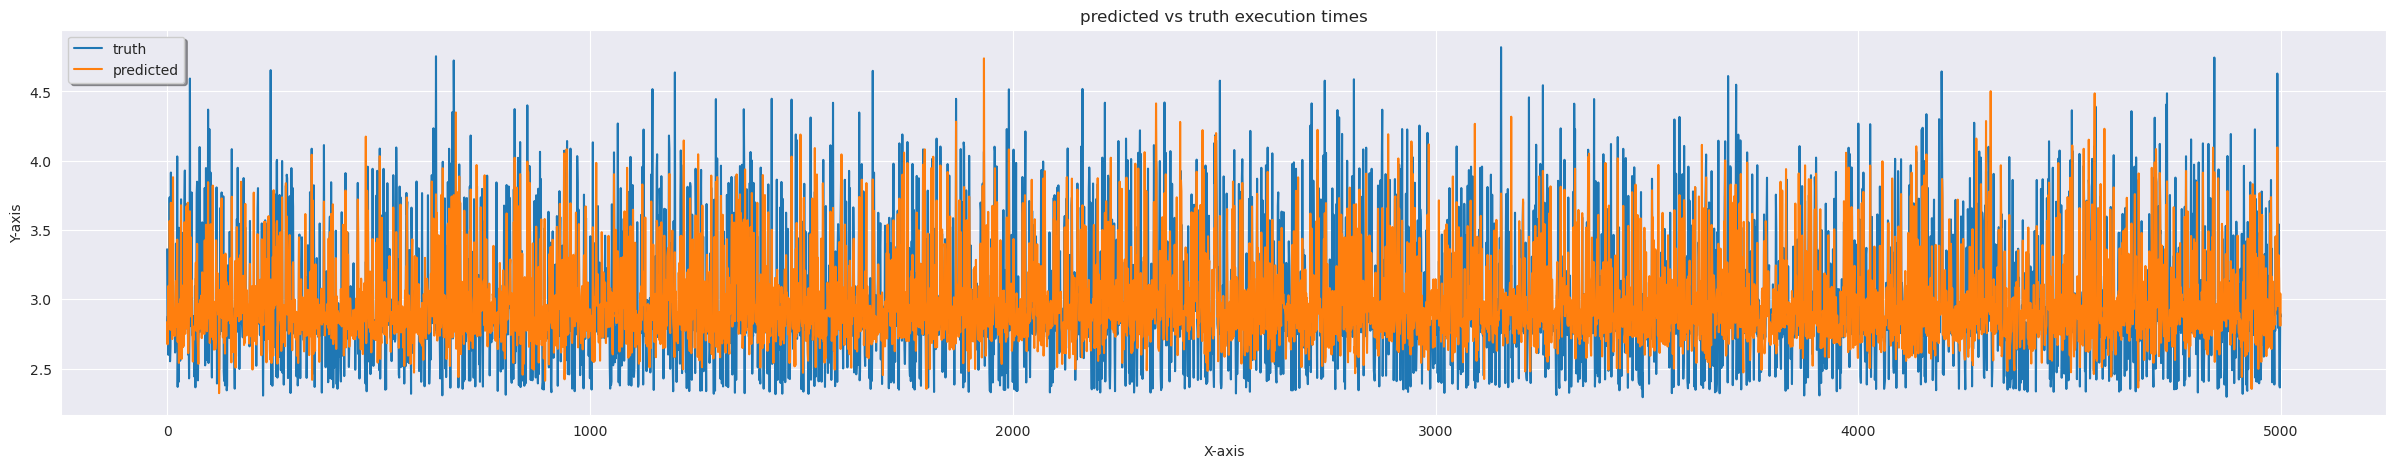

In [51]:
x_ax = range(len(y_human))
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(5)
plt.plot(x_ax, y_human, label="truth")
plt.plot(x_ax, predictions, label="predicted")
plt.title("predicted vs truth execution times")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [52]:
rmsle_cv = mean_squared_log_error(y_human,predictions)**0.5        
rmsle_cv

0.08700571791445168

In [53]:
predictions_non_log = 10**(predictions)
y_human_non_log = 10**(y_human)

In [54]:
rmsle_non_log = mean_squared_log_error(y_human_non_log,predictions_non_log)**0.5        
rmsle_non_log

0.823946250034157